## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [4]:
# 把兩個訓練資料集和測試資料集讀進來

df_train = pd.read_csv('Titanic_train.csv')
df_test = pd.read_csv('Titanic_test.csv')

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [5]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
print('Test資料集沒有Survived')

Test資料集沒有Survived


## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [31]:
#可以嘗試用範例的程式
missing = df_test.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)

Missing_count = pd.DataFrame({'ColumnName':missing.index,'Missingcount':missing.values})
print(Missing_count)

  ColumnName  Missingcount
0       Fare             1
1        Age            86
2      Cabin           327


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [36]:
#合併資料
data = df_train.append(df_test)
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [58]:
# 以 XXX 為例，先看 Cabin  出現值的特性
data['Cabin'].value_counts()
data['Cabin'].head(10)
data['Cabin'] = data['Cabin'].apply(lambda x: str(x)[0] if not pd.isnull(x) else 'NoCabin')
print(data['Cabin'])
data['Cabin'].unique()

0      N
1      C
2      N
3      C
4      N
      ..
413    N
414    C
415    N
416    N
417    N
Name: Cabin, Length: 1309, dtype: object


array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

C:\Users\Eddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


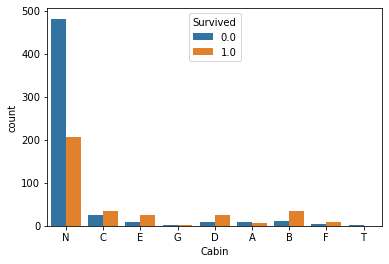

In [61]:
sns.countplot(data['Cabin'],hue=data['Survived'])